## Gradient Boosting Regressor

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.model_selection import train_test_split

In [2]:
diabetes=datasets.load_diabetes()
X,y=diabetes.data,diabetes.target

In [3]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [4]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=13)

params={"n_estimators":500,
       "max_depth":4,"min_samples_split":5,
       "learning_rate":0.01,
        "loss":"ls"}    ## ls=listlogloss



In [7]:
reg=ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train,y_train)

mse=mean_squared_error(y_test,reg.predict(X_test))
print("the mean squared error(MSE) on the test dataset: {:.4f}".format(mse))
r_score=r2_score(y_test,reg.predict(X_test))
print("the R_score of the test data:",r_score)

the mean squared error(MSE) on the test dataset: 3011.8179
the R_score of the test data: 0.42160806332546674


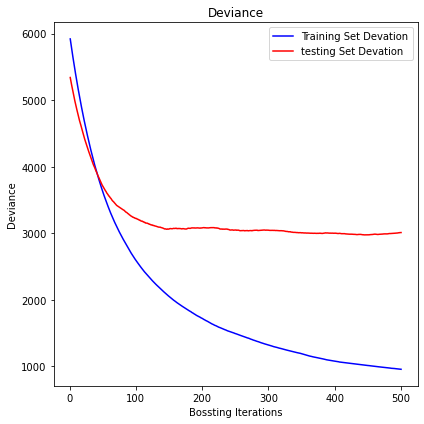

In [8]:
test_score=np.zeros((params["n_estimators"],),dtype=np.float64)
for i,y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i]=reg.loss_(y_test,y_pred)
    
fig=plt.figure(figsize=(6,6))
plt.subplot(1,1,1)
plt.title("Deviance")
plt.plot(np.arange(params["n_estimators"]) +1,reg.train_score_,"b-",
        label="Training Set Devation")
plt.plot(np.arange(params["n_estimators"]) +1,test_score,"r-",
        label="testing Set Devation")
plt.legend(loc="upper right")
plt.xlabel("Bossting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

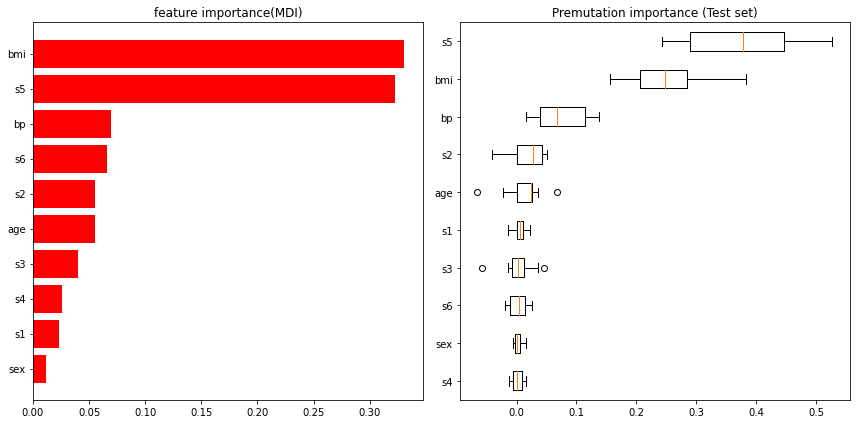

In [25]:
feature_importance=reg.feature_importances_
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0]) +.5
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.barh(pos,feature_importance[sorted_idx], align="center",color="red")
plt.yticks(pos,np.array(diabetes.feature_names)[sorted_idx])
plt.title("feature importance(MDI)")

result=permutation_importance(reg,X_test,y_test,n_repeats=10,random_state=42,n_jobs=2)

sorted_idx=result.importances_mean.argsort()
plt.subplot(1,2,2)
plt.boxplot(result.importances[sorted_idx].T,
           vert=False,labels=np.array(diabetes.feature_names)[sorted_idx])
plt.title("Premutation importance (Test set)")
fig.tight_layout()
plt.show()

### Hyperparameter tuning

In [9]:
from  sklearn.model_selection import GridSearchCV

In [10]:
params1={"n_estimators":[100,150],"max_depth":[3,4]
        ,"min_samples_split":[3,4],
         "learning_rate":[0.1,0.01,0.10],
        "loss":["ls"]}

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
gr1=GridSearchCV(estimator=reg,param_grid=params1)
gr1.fit(X_train,y_train)
gr1.best_params_,gr1.best_score_

({'learning_rate': 0.1,
  'loss': 'ls',
  'max_depth': 3,
  'min_samples_split': 4,
  'n_estimators': 100},
 0.4574594732357077)

In [12]:
mse=mean_squared_error(y_test,gr1.predict(X_test))
print("the mean squared error(MSE) on the test dataset: {:.4f}".format(mse))

the mean squared error(MSE) on the test dataset: 3203.0495


In [13]:
gr2=GradientBoostingRegressor(learning_rate= 0.1,
  loss= 'ls',
  max_depth= 3,
  min_samples_split= 4,
  n_estimators= 100)


In [14]:
gr2.fit(X_train,y_train)

GradientBoostingRegressor(min_samples_split=4)

In [15]:
pred=gr2.predict(X_test)
mse=mean_squared_error(y_test,pred)
print("the mean squared error(MSE) on the test dataset: {:.4f}".format(mse))
r_score=r2_score(y_test,pred)
print("the R_score of the test data:",r_score)                       

the mean squared error(MSE) on the test dataset: 3146.8434
the R_score of the test data: 0.395677654582854


## Gradient Boosting Classifier

In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
df=pd.DataFrame(load_breast_cancer()["data"],
               columns=load_breast_cancer()["feature_names"])
df["y"]=load_breast_cancer()["target"]
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [29]:
X,y=df.drop("y",axis=1),df.y
kf=KFold(n_splits=5,random_state=42,shuffle=True)
for train_index,val_index in kf.split(X):
    X_train,X_val=X.iloc[train_index],X.iloc[val_index],
    y_train,y_val=y.iloc[train_index],y.iloc[val_index]

In [30]:
gradient_booster=GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [31]:
gradient_booster.fit(X_train,y_train)
print(classification_report(y_val,gradient_booster.predict(X_val)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.96      0.99      0.97        67

    accuracy                           0.96       113
   macro avg       0.97      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113



## Adapative Boosting(Classification)

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [34]:
X,y=make_classification(n_samples=1000,n_features=4,
                       n_informative=2,n_redundant=0,random_state=0,
                       shuffle=False)

In [35]:
clf=AdaBoostClassifier(n_estimators=100,random_state=0)

In [36]:
clf.fit(X,y)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [37]:
clf.predict([[0,0,0,0]])

array([1])

In [38]:
clf.score(X,y)

0.983